In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../Cases/Boston Housing/Boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
X, y = df.drop('medv', axis=1), df['medv']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, accuracy_score, f1_score

In [19]:
dtr = DecisionTreeRegressor(random_state=24, max_depth=None, min_samples_split=20, min_samples_leaf=1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_split=20, random_state=24)

In [21]:
y_pred = dtr.predict(X_test)
print(r2_score(y_test, y_pred))


0.7252307683841593


In [26]:
max_depths = [2,3,5,None]
min_samples_splits = np.arange(2,100,4)
min_samples_leafs = np.arange(1,100,5)
scores = []

for i in max_depths:
    for j in min_samples_splits:
        for k in min_samples_leafs:
            dct = DecisionTreeRegressor(random_state=24, max_depth=i, min_samples_split=j, min_samples_leaf=k)
            dct.fit(X_train, y_train)
            y_pred = dct.predict(X_test)
            scores.append([i, j, k, r2_score(y_test, y_pred)])

df_scores = pd.DataFrame(scores, columns=['Max_Depth', 'Min_Samples_Split', 'Min_Samples_leaf', 'R2_score'])
df_scores.sort_values('R2_score', ascending=False).iloc[0]

Max_Depth                  NaN
Min_Samples_Split    34.000000
Min_Samples_leaf      1.000000
R2_score              0.749559
Name: 1660, dtype: float64

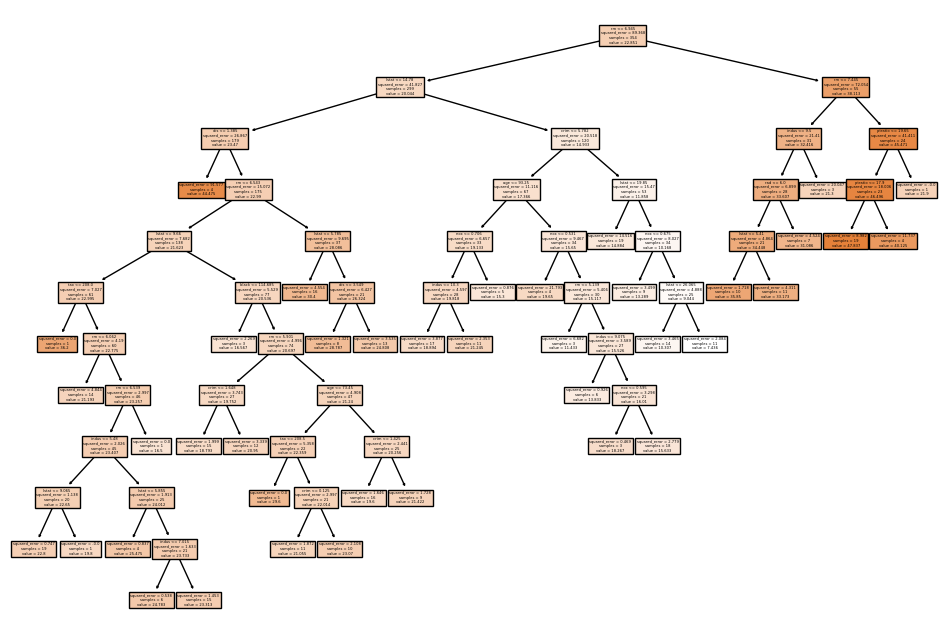

In [37]:
dtr = DecisionTreeRegressor(random_state=24, max_depth=None, min_samples_split=20, min_samples_leaf=1)
dtr.fit(X_train, y_train)
from sklearn import tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dtr, feature_names=list(X_train.columns), filled=True)
plt.show()

In [28]:
import matplotlib.pyplot as plt

In [40]:
dtr.feature_importances_

array([0.03245174, 0.        , 0.01672397, 0.        , 0.00992079,
       0.63190947, 0.00853919, 0.06308985, 0.00198742, 0.00777729,
       0.02599954, 0.00164761, 0.19995313])

In [41]:
dtr.feature_names_in_

array(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat'], dtype=object)

In [42]:
df_imp = pd.DataFrame({'Importance': dtr.feature_importances_, 'Column': dtr.feature_names_in_})
df_imp.sort_values('Importance', ascending=False, inplace=True)

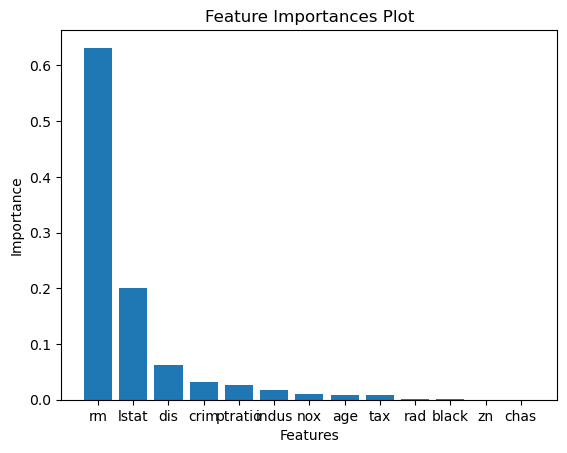

In [43]:
plt.bar(df_imp['Column'], df_imp['Importance'])
plt.title('Feature Importances Plot')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()